In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.colors as cs
from sklearn import preprocessing
import time

from sklearn.decomposition import PCA

from tslearn.generators import random_walks
from tslearn.clustering import KShape,TimeSeriesScalerMeanVariance


import seaborn as sns
import numpy as np
from numpy.random import randn
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
def preprocessing_weights(file_path):
    weight = pd.read_csv(file_path,header = None)
    for i in range(1,weight.shape[0]):
        weight.loc[i-1,] = ((weight.loc[i,] - weight.loc[i-1,])/weight.loc[i,]).abs()
        if(i % 500 == 0): 
            print("processing at line: ",i)
    weight.drop([weight.shape[0]-1],inplace =True)
    newfile = file_path.split('.csv')[0] + "_weighted" + ".csv"
    
    weight.to_csv(newfile)
    return

In [ ]:
preprocessing_weights('./weights/1.csv')

In [ ]:
# preprocessing_weights('./weights/2.csv')

In [ ]:
preprocessing_weights('./weights/4.csv')


In [ ]:
preprocessing_weights('./weights/5.csv')

In [ ]:
preprocessing_weights('./weights/7.csv')

In [ ]:
preprocessing_weights('./weights/8.csv')

In [ ]:
# wei_5


### How to read

In [ ]:
wei_5 = pd.read_csv("weights/5_weighted.csv").drop('Unnamed: 0',axis=1)


In [ ]:
wei_1 = pd.read_csv("weights/1_weighted.csv").drop('Unnamed: 0',axis=1)
wei_4 = pd.read_csv("weights/4_weighted.csv").drop('Unnamed: 0',axis=1)
wei_5 = pd.read_csv("weights/5_weighted.csv").drop('Unnamed: 0',axis=1)
wei_7 = pd.read_csv("weights/7_weighted.csv").drop('Unnamed: 0',axis=1)


print(wei_1.shape)

print(wei_4.shape)

print(wei_5.shape)
print(wei_7.shape)


In [ ]:


# iter_range = wei_5.shape[0]
# wei_5_clip = wei_5.clip(upper=200)
# plt.figure()
# x= range(0,iter_range)
# for i in range(wei_5.shape[1]):
#     plt.plot(x,wei_5_clip.iloc[:iter_num,[i]].values)
# plt.legend(loc='best')
# plt.show()

In [ ]:
# iter_range = wei_1.iloc[:,[2]].shape[0]
# wei_1_clip = wei_1.clip(upper=200)
# plt.figure()
# x= range(0,iter_range)
# for i in range(wei_1.shape[1]):
#     plt.plot(x,wei_1_clip.iloc[:iter_num,[i]].values)
# plt.legend(loc='best')
# plt.show()

In [ ]:
# iter_range = wei_7.iloc[:,[2]].shape[0]
# wei_7_clip = wei_7.clip(upper=200)
# plt.figure()
# x= range(0,iter_range)
# for i in range(wei_7.shape[1]):
#     plt.plot(x,wei_7_clip.iloc[:iter_num,[i]].values)
# plt.legend(loc='best')
# plt.show()

In [ ]:
wei_5_tran =  wei_5.transpose().clip(upper=200)


In [ ]:
wei_1_tran =  wei_1.transpose().clip(upper=200)

wei_4_tran =  wei_4.transpose().clip(upper=200)

wei_5_tran =  wei_5.transpose().clip(upper=200)
wei_7_tran =  wei_7.transpose().clip(upper=200)


In [ ]:


# print(wei_1_tran.shape)


# append_1_5_7 = pd.concat([wei_1_tran,wei_5_tran,wei_7_tran])
# append_1_5_7.to_csv('append_1_5_7.csv',index = False)
# print(append_1_5_7.shape)

append_1_4_5_7 = pd.concat([wei_1_tran,wei_4_tran,wei_5_tran,wei_7_tran])
append_1_4_5_7.to_csv('append_1_4_5_7.csv',index = False)
print(append_1_4_5_7.shape)




In [ ]:
# wei_5_tran.shape

### Clustering
#### 尝试了用min-max以后丢给kmeans效果很差 结果像噪声。
#### 试试pca以后再给kmeans

In [5]:
# wei_1_5_7 = pd.read_csv('append_1_5_7.csv')
wei_1_4_5_7 = pd.read_csv('append_1_4_5_7.csv')

# nullcheck = wei_1_5_7.isnull().sum()/len(wei_1_5_7) * 100


# min_max_scaler = preprocessing.MinMaxScaler()
# min_max_scaler.fit(wei_1_4_5_7)

In [3]:
wei_1_4_5_7.values.shape[0]

74048

In [ ]:
# centroids[2]
plt.figure()
x= range(0,wei_1_4_5_7.values.shape[0])
plt.plot(x,centroids[2])
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
wei_1_4_5_7 = pca.fit_transform(wei_1_4_5_7)

In [ ]:
wei_1_4_5_7.shape

In [ ]:
kmeans = KMeans(n_clusters=3, max_iter=300,random_state=3)
kmeans.fit(wei_1_4_5_7)


In [ ]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_


In [ ]:
centroids.shape

In [ ]:
labels.shape

In [ ]:
marks = ['x', '.', '+', 'v']
colors = []
for c in cs.cnames:
    colors.append(c)

x= range(0,centroids.shape[1])

for i in range(centroids.shape[0]):
    plt.plot(x, centroids[i], linestyle='--',  marker=marks[1], label="class"+str(i))
plt.xlabel("Iterations")
plt.ylabel("Gradient Value/ Parameter Value (%)")
#plt.ylabel("Gradient")
#plt.legend(prop={'size': 12})
plt.legend()

#plt.savefig("fig2.jpg")
plt.show()


In [ ]:
# centroids[:,1]

In [ ]:
len(centroids[:, 1])

In [ ]:
centroids[1].shape

In [ ]:
cluster_num = centroids.shape[0]
clustering_res = [0] * cluster_num

for i in range(len(labels)):
    clustering_res[labels[i]] += 1
clustering_res
        

In [ ]:
centroids[0]

In [ ]:
# centroids[0]
plt.figure()
x= range(0,centroids[1].shape[0])
plt.plot(x,centroids[0])
plt.legend(loc='best')
plt.show()

In [ ]:
# centroids[1]
plt.figure()
x= range(0,centroids[1].shape[0])
plt.plot(x,centroids[1])
plt.legend(loc='best')
plt.show()

In [ ]:
# centroids[2]
plt.figure()
x= range(0,centroids[1].shape[0])
plt.plot(x,centroids[2])
plt.legend(loc='best')
plt.show()

In [ ]:
res = kmeans.labels_


In [ ]:
print(np.where(res==0)[0])
print(np.where(res==1)[0])
print(np.where(res==2)[0])


In [ ]:
np.savetxt("./cluster_result/clu_1.csv",np.where(res==1)[0].astype(int),fmt='%d',delimiter=",") 




In [ ]:
np.savetxt("./cluster_result/clu_2.csv",np.where(res==2)[0].astype(int),fmt='%d',delimiter=",") 



### Try Clustering in a time-series way

In [2]:
from tslearn.generators import random_walks
from tslearn.clustering import KShape,TimeSeriesScalerMeanVariance

In [ ]:
wei_5_tran.values.shape

In [ ]:
wei_5_tran.shape

In [ ]:
# wei_5_ts = wei_5_tran.values.reshape(wei_5_tran.shape[0],wei_5_tran.shape[1],1)

In [6]:
wei_1_4_5_7_ts = wei_1_4_5_7.values.reshape(wei_1_4_5_7.shape[0],wei_1_4_5_7.shape[1],1)

In [ ]:
# wei_5_ts = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(wei_5_ts)

In [7]:
wei_1_4_5_7_ts = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(wei_1_4_5_7_ts)

In [ ]:
# cluster_number = 3 
# ks = KShape(n_clusters=cluster_number, n_init=1, verbose=False, random_state=0).fit(wei_5_ts)

In [8]:
cluster_number = 3 
ks = KShape(n_clusters=cluster_number, n_init=1, verbose=False, random_state=0).fit(wei_1_4_5_7_ts)

In [9]:
labels = ks.labels_
centroids = ks.cluster_centers_

In [10]:
clustering_res = [0] * cluster_number
for i in range(len(labels)):
    clustering_res[labels[i]] += 1
clustering_res

[25770, 24400, 23878]

array([2, 2, 2, ..., 2, 2, 2])

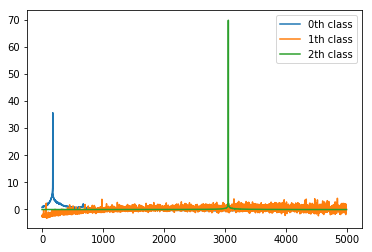

In [12]:
plt.figure()
x= range(0,centroids[0].shape[0])
for i in range(len(centroids)):
    plt.plot(x,centroids[i],label = str(i)+'th class')
plt.legend(loc='best')
plt.show()

In [19]:
print(np.where(labels==0)[0],"number of params: ",len(np.where(labels==0)[0]))
print(np.where(labels==1)[0],"number of params: ",len(np.where(labels==1)[0]))
print(np.where(labels==2)[0],"number of params: ",len(np.where(labels==2)[0]))


[   21    22    40 ... 74018 74026 74039] number of params:  25770
[   53    64    66 ... 73783 73788 73790] number of params:  24400
[    0     1     2 ... 74045 74046 74047] number of params:  23878


In [18]:
np.savetxt("./kshape_res/clu_0.csv",np.where(labels==0)[0].astype(int),fmt='%d',delimiter=",") 
np.savetxt("./kshape_res/clu_1.csv",np.where(labels==1)[0].astype(int),fmt='%d',delimiter=",") 
np.savetxt("./kshape_res/clu_2.csv",np.where(labels==2)[0].astype(int),fmt='%d',delimiter=",") 


 #### 2nd trail of kshape (with random state = 1 , previously which is 0)


In [6]:
start= time.time()
wei_1_4_5_7_ts = wei_1_4_5_7.values.reshape(wei_1_4_5_7.shape[0],wei_1_4_5_7.shape[1],1)
wei_1_4_5_7_ts = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(wei_1_4_5_7_ts)

cluster_number = 3 
ks = KShape(n_clusters=cluster_number, n_init=1, verbose=False, random_state=1).fit(wei_1_4_5_7_ts)

end = time.time()
print("used time: ", end-start,"seconds ")

used time:  3674.6829776763916 seconds 


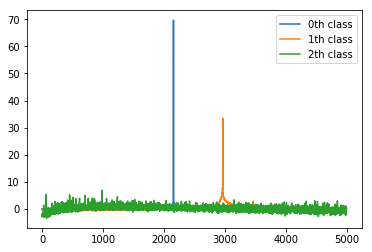

In [7]:
labels = ks.labels_
centroids = ks.cluster_centers_
plt.figure()
x= range(0,centroids[0].shape[0])
for i in range(len(centroids)):
    plt.plot(x,centroids[i],label = str(i)+'th class')
plt.legend(loc='best')
plt.show()

In [5]:
!mkdir kshape_res2

In [8]:
np.savetxt("./kshape_res2/clu_0.csv",np.where(labels==0)[0].astype(int),fmt='%d',delimiter=",") 
np.savetxt("./kshape_res2/clu_1.csv",np.where(labels==1)[0].astype(int),fmt='%d',delimiter=",") 
np.savetxt("./kshape_res2/clu_2.csv",np.where(labels==2)[0].astype(int),fmt='%d',delimiter=",") 


#### Compare 2 results

##### 全程变化不大的一类

In [9]:
k1c1 = []
with open('./kshape_res/clu_1.csv') as f:
    for line in f:
        k1c1.append(int(line))

In [11]:
len(k1c1)

24400

In [13]:
k2c2 = []
with open('./kshape_res2/clu_2.csv') as f:
    for line in f:
        k2c2.append(int(line))

In [14]:
len(k2c2)

22559

In [15]:
intersection = list(set(k1c1).intersection(set(k2c2)))

In [18]:
len(intersection) / min(len(k1c1),len(k2c2))

0.6240081563899109

两次聚类交集有62.4%

##### pulse在前的一类

In [19]:
k1c0 = []
with open('./kshape_res/clu_0.csv') as f:
    for line in f:
        k1c0.append(int(line))

In [20]:
k2c0 = []
with open('./kshape_res2/clu_0.csv') as f:
    for line in f:
        k2c0.append(int(line))

In [21]:
intersection = list(set(k1c0).intersection(set(k2c0)))
print(len(intersection))
print(len(intersection) / min(len(k1c1),len(k2c2)))

924
0.04095926237865154


4%的交集

##### pulse在后的一类

In [22]:
k1c2 = []
with open('./kshape_res/clu_2.csv') as f:
    for line in f:
        k1c2.append(int(line))
k2c1 = []
with open('./kshape_res2/clu_1.csv') as f:
    for line in f:
        k2c1.append(int(line))

In [23]:
intersection = list(set(k1c2).intersection(set(k2c1)))
print(len(intersection))
print(len(intersection) / min(len(k1c2),len(k2c1)))

465
0.019473992796716643


交集只有1.9%

### 时间序列也不行，再进一步观察看看

In [3]:
import seaborn as sns
import numpy as np
from numpy.random import randn
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats

In [10]:
wei_1_4_5_7 = pd.read_csv('append_1_4_5_7.csv')


In [29]:
mean_list = []
var_list = []
count = 0
for index,row in wei_1_4_5_7.T.iteritems():
    var_list.append(row.var())
    mean_list.append(row.mean())


In [149]:
len(var_list)

74048

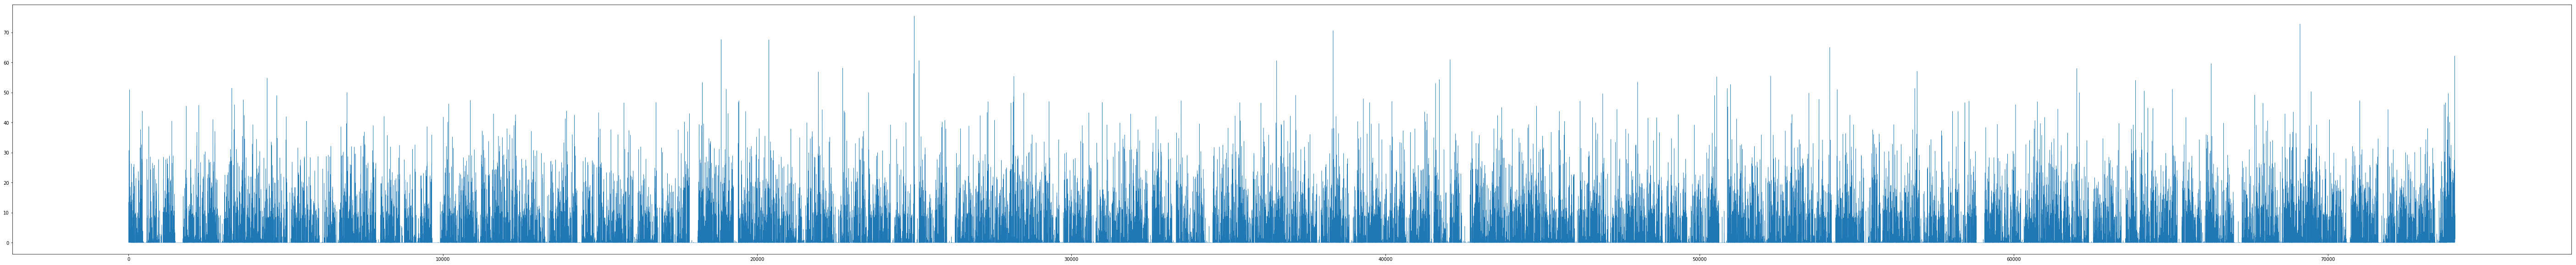

In [84]:
plt.figure(figsize=(100,10))
plt.plot(range(0,len(mean_list)),var_list,lw=0.5)

In [39]:
var_list=np.array(var_list)
type(var_list)

numpy.ndarray

In [59]:
var_list[:10]

array([1.04276835e+00, 3.01766408e+00, 2.26108963e-01, 1.34751495e+01,
       1.23113820e+01, 2.78471143e-01, 5.25481575e-02, 1.06431507e+01,
       2.32713433e-04, 3.07378467e+01])

In [153]:
np.where(var_list > 10 )[0][:100]

array([   3,    4,    7,    9,   11,   18,   20,   24,   25,   26,   29,
         33,   35,   51,   52,   55,   63,   69,   80,   82,   88,   99,
        100,  108,  111,  138,  144,  152,  154,  156,  157,  170,  172,
        174,  178,  186,  234,  285,  312,  327,  347,  351,  360,  367,
        377,  391,  401,  407,  408,  411,  415,  417,  418,  431,  433,
        434,  437,  439,  577,  578,  607,  643,  648,  692,  698,  711,
        712,  764,  788,  802,  811,  815,  855,  861,  877,  883,  886,
        889,  891,  951,  955,  985, 1097, 1105, 1112, 1118, 1130, 1138,
       1157, 1171, 1183, 1196, 1208, 1217, 1222, 1226, 1231, 1240, 1244,
       1248])

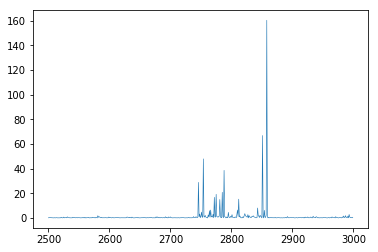

In [157]:
i = 4
# plt.figure(figsize=(100,5))
plt.plot(range(2500,3000),wei_1_4_5_7.values[i][2500:3000],lw=0.6)

In [1]:
tmp = wei_1_4_5_7.values[0]

NameError: name 'wei_1_4_5_7' is not defined

In [ ]:
len(np.where(tmp>5)[0])

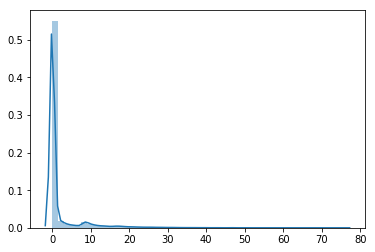

In [137]:
sns.distplot(var_list)
# sns.distplot(var_list, hist=False)

In [12]:
flat_all = wei_1_4_5_7.values.flatten()

In [22]:
len(np.where(flat_all <= 0.01)[0]) 

232415870

In [23]:
len(np.where(flat_all <= 0.01)[0])  / flat_all.shape[0]

0.6291278961944454

### 很多都在0值附近，clip成0先
### 然后找找看有没有对于稀疏向量聚类算法
### 或者换一种编码方式/降维以后再聚类

In [40]:
# wei_1_4_5_7

In [25]:
sparse_wei1457 = wei_1_4_5_7.clip(lower=0.01).replace(0.01, 0)

In [27]:
mean_list = []
var_list = []
count = 0
for index,row in sparse_wei1457.T.iteritems():
    var_list.append(row.var())
    mean_list.append(row.mean())


### 试试谱聚类

In [58]:
# sparse_wei1457

In [4]:
from sklearn.cluster import SpectralClustering

In [46]:
# spect_clustering = SpectralClustering(n_clusters=3,
#          assign_labels="discretize",
#          random_state=0).fit(sparse_wei1457.values)

In [59]:
spect_clustering = SpectralClustering(n_clusters=3,eigen_solver = 'amg')

# spect_res = spect_clustering.fit(sparse_wei1457)


#### 因为矩阵奇艺值分解需要O(n^2)的空间复杂度。把这么大一个丢进去有问题。拿个小的试试看

In [4]:
wei_1 = pd.read_csv("weights/1_weighted.csv").drop('Unnamed: 0',axis=1)
wei_5 = pd.read_csv("weights/5_weighted.csv").drop('Unnamed: 0',axis=1)
wei_7 = pd.read_csv("weights/7_weighted.csv").drop('Unnamed: 0',axis=1)
upper_bound = 10
wei_1_tran =  wei_1.transpose().clip(upper=upper_bound)
wei_5_tran =  wei_5.transpose().clip(upper=upper_bound)
wei_7_tran =  wei_7.transpose().clip(upper=upper_bound)
# 先clip lower bound
append_1_5_7 = pd.concat([wei_1_tran,wei_5_tran,wei_7_tran])
sparse_wei157 = append_1_5_7.clip(lower=0.01).replace(0.01, 0)

# 再min-max scaler
min_max_scaler = preprocessing.MinMaxScaler()
scaled_wei_157 = min_max_scaler.fit_transform(sparse_wei157)

In [160]:
spect_clustering = SpectralClustering(n_clusters=3,eigen_solver = 'arpack', assign_labels="discretize",random_state=0)
spect_res = spect_clustering.fit(sparse_wei157.values)



/userhome/34/gyu/anaconda3/envs/tensorflow2/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [161]:
labels = spect_res.labels_
clustering_res = [0] * 3
for i in range(len(labels)):
    clustering_res[labels[i]] += 1
clustering_res

[180, 61, 79]

In [173]:
res0 = []
s0c0 = np.where(np.array(spect_res.labels_) == 0)[0] 
s0c1 = np.where(np.array(spect_res.labels_) == 1)[0] 
s0c2 = np.where(np.array(spect_res.labels_) == 2)[0] 
res0.append(s0c0)
res0.append(s0c1)
res0.append(s0c2)
res0.sort(key = len)
print(len(s0c0),len(s0c1),len(s0c2))

180 61 79


In [162]:
spect_clustering2 = SpectralClustering(n_clusters=3,eigen_solver = 'arpack', assign_labels="discretize",random_state=1)
spect_res2 = spect_clustering2.fit(sparse_wei157.values)



/userhome/34/gyu/anaconda3/envs/tensorflow2/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [172]:
res1 = []
s1c0 = np.where(np.array(spect_res2.labels_) == 0)[0] 
s1c1 = np.where(np.array(spect_res2.labels_) == 1)[0] 
s1c2 = np.where(np.array(spect_res2.labels_) == 2)[0] 
res1.append(s1c0)
res1.append(s1c1)
res1.append(s1c2)
res1.sort(key = len)
print(len(s1c0),len(s1c1),len(s1c2))

81 228 11


In [171]:
for i in range(0,len(res0)):
    intersection = list(set(res0[i]).intersection(set(res1[i])))
    print(len(res0[i]),len(res1[i]),len(intersection) / max(len(res0[i]),len(res1[i])))

23 11 0.043478260869565216
53 81 0.38271604938271603
69 228 0.11842105263157894


In [175]:
intersection = list(set(s0c0).intersection(set(s1c1)))
print(len(intersection) / max(len(s0c0),len(s1c1)))

0.7675438596491229


In [138]:
intersection = list(set(s0c2).intersection(set(s1c1)))
print(len(intersection) / max(len(s0c2),len(s1c1)))

0.2602739726027397


(320, 4989)

也没有那么靠谱 但是好像比之前好点

### 用质心表示参数 (KDE核函数估计 提取质心)

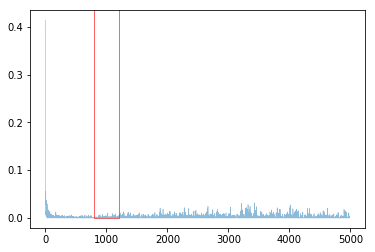

In [157]:
i = 30
x1 = range(0,scaled_wei_157[i].shape[0])
y1 = scaled_wei_157[i]

rect = patches.Rectangle((800,0),400,1,linewidth=0.6,edgecolor='r',facecolor='None')


fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x1,y1,lw=0.6,alpha=0.5)

ax.add_patch(rect)
plt.show()


In [158]:

tmp = np.array(scaled_wei_157[i])



In [184]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from distutils.version import LooseVersion
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

# for kernel in ['gaussian', 'tophat', 'epanechnikov']:
#     kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(tmp)
#     log_dens = kde.score_samples(X_plot)
#     ax.plot(X_plot[:, 0], np.exp(log_dens), '-',
#             label="kernel = '{0}'".format(kernel))

KernelDensity(algorithm='auto', atol=0, bandwidth=200, breadth_first=True,
              kernel='tophat', leaf_size=40, metric='euclidean',
              metric_params=None, rtol=0)

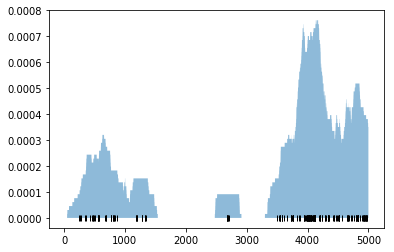

array([  51,   52,   53, ..., 4997, 4998, 4999])

In [149]:
def longest_interval(array):
    # get all break indexes
    
    start = array[0]
    end = array[-1]
        
    break_index = []
    for i in range(1,len(array)):
        if(array[i] != array[i-1] + 1):
            break_index.append(i-1)
            
    # no break 
    if(len(break_index) == 0): 
        return start,end
    # only one break
    elif len(break_index) == 1: 
        b = break_index[0]
        if(b > len(array) - 1 - (b+1)):
            start = array[0]
            end = array[b]
        else:
            start = array[b+1]
            end = array[-1]
    # more than one breaks
    else: 
        start = array[0]
        end = array[break_index[0]]
        longest = break_index[0] + 1
        for i in range(1,len(break_index)):
            if(break_index[i] - break_index[i-1] > longest):
                start = array[break_index[i-1] + 1]
                end = array[break_index[i]]
                longest = break_index[i] - break_index[i-1]
        if(longest < array[-1] - break_index[-1]):
            start = array[break_index[-1]+1]
            end = array[-1]
        
    return start,end


In [165]:
i = 30

param_i =  scaled_wei_157[i]
param_i_ones = np.where(param_i==1)[0]


In [167]:
param_i_ones
param_i_ones = param_i_ones.reshape(-1,1)


In [213]:
i = 30

param_i =  scaled_wei_157[i]
param_i_ones = np.where(param_i==1)[0]
param_i_ones = param_i_ones.reshape(-1,1)
if(len(param_i_ones) < 1):
    print("no peek !!!")
else:
    kde = KernelDensity(kernel='tophat',bandwidth = 300)
    kde.fit(param_i_ones)
    x_d = np.linspace(0, 5000, 5000)
    logprob = kde.score_samples(x_d[:,None])
    plt.fill_between(x_d,np.exp(logprob),alpha = 0.5)
    plt.plot(param_i_ones,np.full_like(param_i_ones,-0.01),'|k',markeredgewidth = 1)

    prob_arr = np.array(np.exp(logprob))
    rect_start,rect_end = longest_interval(np.where(prob_arr>0)[0])
    rect_width= rect_end - rect_start
    x1 = range(0,param_i.shape[0])
    y1 = param_i

    rect = patches.Rectangle((rect_start,0),rect_width,1,linewidth=0.6,edgecolor='r',facecolor='None')

    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(x1,y1,lw=0.6,alpha=0.5)

    ax.add_patch(rect)
    plt.show()
    print("from: ",rect_start)
    print("to: ", rect_end)


no peek !!!
